In [62]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

import os

from cascid.configs import pad_ufes,config
from cascid import image_preprocessing, image_sampling


In [144]:
HED = "../../../HED/"
HED_RESULTS = HED + "HED_RESULTS/"

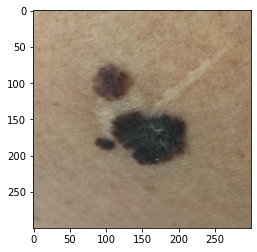

In [145]:
original = cv2.imread(HED+"original.png")[:,:,::-1]
original=cv2.resize(original,(300,300))
plt.imshow(original)


In [22]:
def all_imgs(src_dir):
    imgs_list = []
    for f in os.listdir(src_dir):
        if f.endswith(".png") or f.endswith(".jpg"):
            filename = src_dir+f
            img = cv2.imread(filename)[:,:,::-1]
            imgs_list.append(img)
            
    return imgs_list

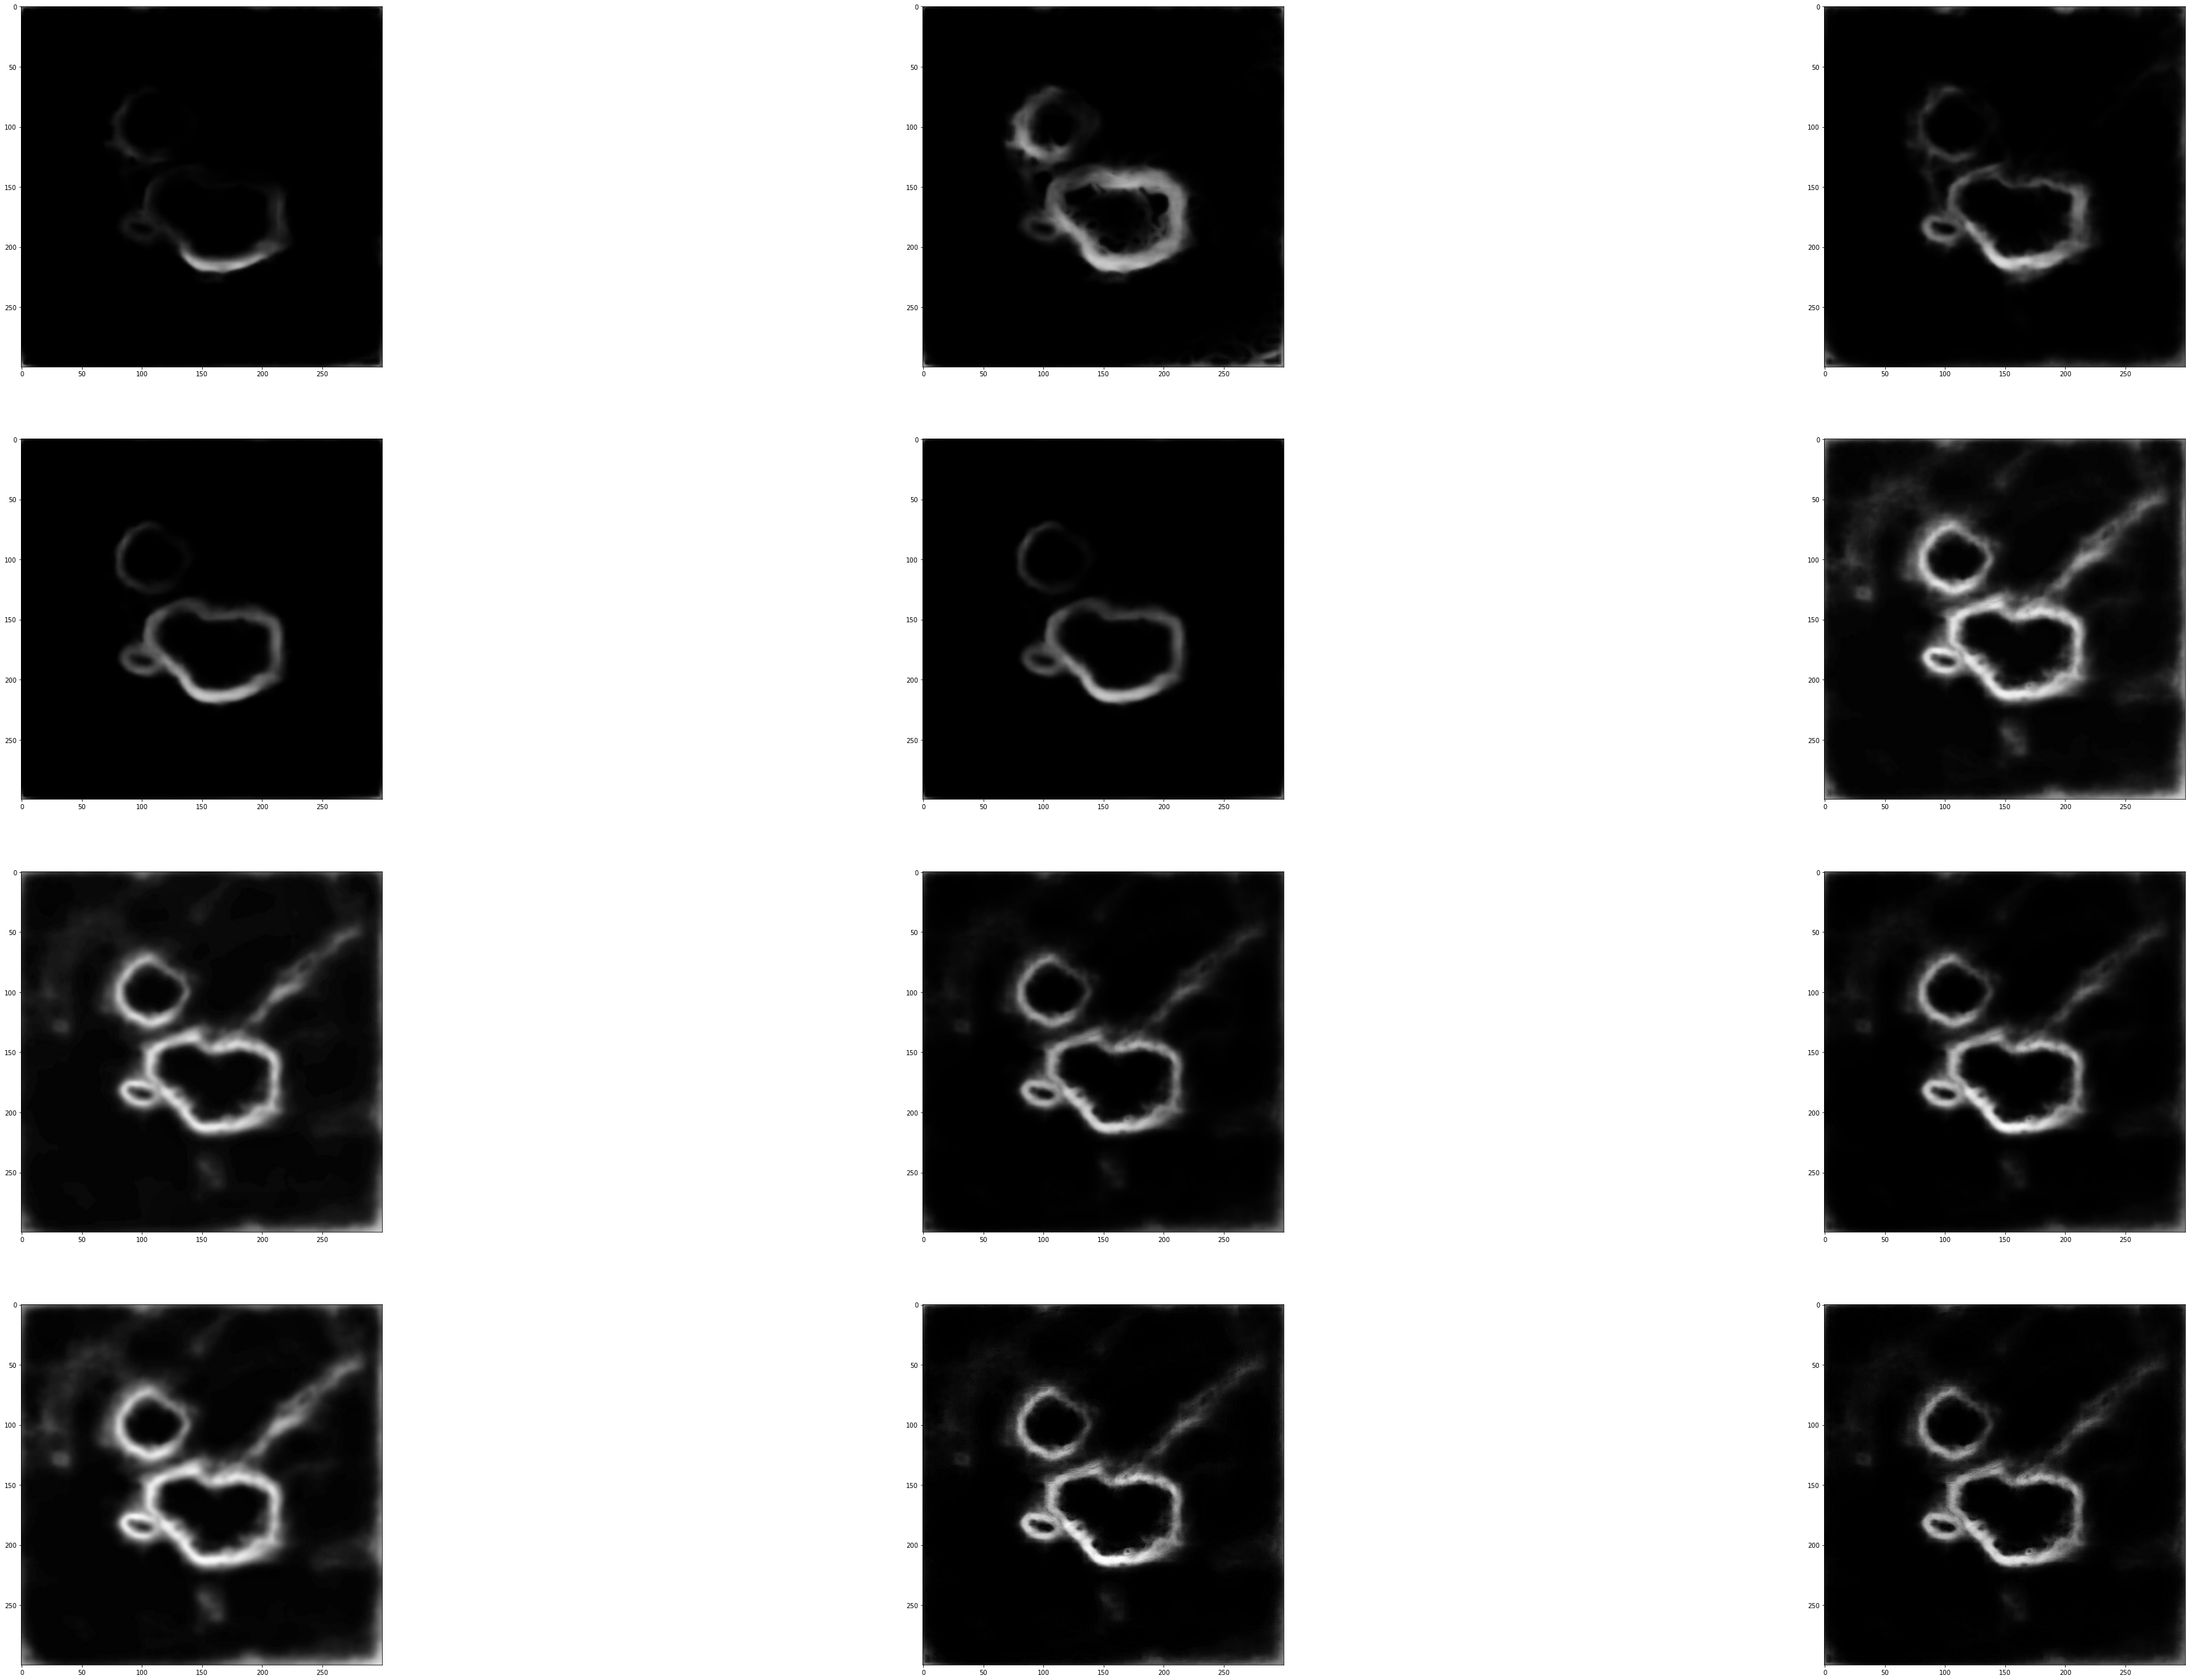

In [23]:
hed_imgs = all_imgs(HED_RESULTS)
image_sampling.image_grid(hed_imgs)

In [81]:
# Função para detectar contornos (Canny)
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged

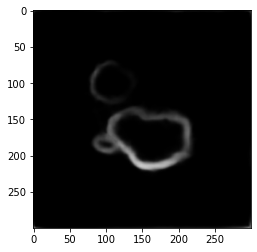

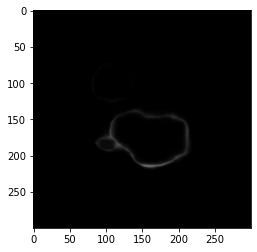

In [140]:
kernel_erosion = np.ones((3,3),np.uint8)
hed = hed_imgs[3]
plt.imshow(hed,cmap='gray')
plt.show()
mask_erosion = cv2.erode(hed,kernel_erosion,iterations = 4)
plt.imshow(mask_erosion,cmap='gray')


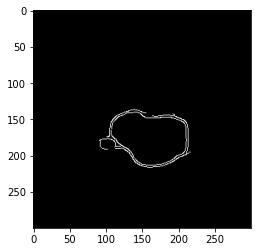

In [141]:
edges = cv2.Canny(mask_erosion, 0, 255)
plt.imshow(edges,cmap='gray')

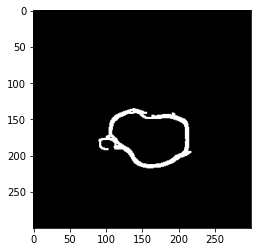

In [142]:
kernel_dilation = np.ones((3,3),np.uint8)
dilation = cv2.dilate(edges.astype('uint8'),kernel_dilation,iterations = 1)
plt.imshow(dilation,cmap='gray')


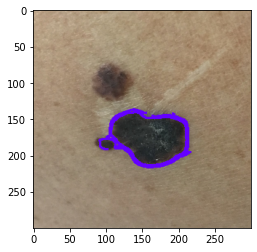

In [146]:
borders = original
borders[dilation != 0] = [100,0,255]
plt.imshow(borders)